In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os

In [31]:
def get_IDs(path):
    separated = path.split(os.sep)
    return tuple(separated[9:12])

# load R2 scores

In [32]:
#to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.ancestry.tsv')
#to_load_R2 += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/SUMMARY/R2_score.ancestry.tsv')
#to_load_R2 = glob.glob('/home/kele/Documents/lai/lai-sim/results/AmericanAdmixture_4B11/AA_42/*/SUMMARY/R2_score.individuals.tsv')
#to_load_R2 += glob.glob('/home/kele/Documents/lai/lai-sim/results/OutOfAfrica_4J17/4pop_79/*/SUMMARY/R2_score.individuals.tsv')

In [33]:
!ls ~/Documents/lai/report/results/lai-sim/results

AmericanAdmixture_4B11	jobs.tsv  memory_usage.txt  OutOfAfrica_4J17


In [34]:
to_load_R2_ancestry = glob.glob('/home/kele/Documents/lai/report/results/lai-sim/results/*/*/*/SUMMARY/R2_score.ancestry.tsv')

R2_dict = {}
for f in to_load_R2_ancestry:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    #print(model_name, sim_id, anal_id )
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    df = df.replace('mosaic', 'MOSAIC').replace('rfmix2', 'RFMix2')
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_anc = pd.concat(R2_dict.values())
R2_anc = R2_anc.query("anal_id not in ['long_run', 'short_run']")

In [24]:
to_load_R2_individuals = glob.glob('/home/kele/Documents/lai/report/results/lai-sim/results/*/*/*/SUMMARY/R2_score.individuals.tsv')

R2_dict = {}
for f in to_load_R2_individuals:
    df = pd.read_csv(f, sep ='\t')
    model_name, sim_id, anal_id = get_IDs(f)
    df[['model_name', 'sim_id', 'anal_id']] = model_name, sim_id, anal_id
    df = df.replace('mosaic', 'MOSAIC').replace('rfmix2', 'RFMix2')
    R2_dict[f] = df.set_index([ 'model_name', 'sim_id', 'anal_id', 'method'])
R2_ind = pd.concat(R2_dict.values())
R2_ind = R2_ind.query("anal_id not in ['long_run', 'short_run']")

In [36]:
threepop_order = [
 '3pop_1',
 '3pop_2',
 '3pop_3',
 '3pop_4',
 '3pop_5',
 '3pop_6',
 '3pop_7',
 '3pop_8',
 '3pop_9',
 '3pop_b',
 '3pop_d',
 '3pop_e'
]

In [37]:
fourpop_order = [
 '4pop_b',
 '4pop_d',
 '4pop_e']

In [38]:
names_dict = {}
names_dict['3pop_1'] = '100 admixed'
names_dict['3pop_2'] = '200 admixed'
names_dict['3pop_3'] = '400 admixed'
names_dict['3pop_4'] = 'Smaller ref panel (200/pop)'
names_dict['3pop_5'] = 'Larger ref panel (800/pop)'
names_dict['3pop_6'] = 'More sites (200K)'
names_dict['3pop_7'] = 'Lower geno error (1e-5)'
names_dict['3pop_8'] = 'Higher geno error (4e-4)'
names_dict['3pop_9'] = 'Fewer cores (4)'

names_dict['3pop_b'] = '3pops, 100K sites'
names_dict['3pop_d'] = '3pops, 200K sites'
names_dict['3pop_e'] = '3pops, 300K sites'

names_dict['4pop_b'] = '4pops, 100K sites'
names_dict['4pop_d'] = '4pops, 200K sites'
names_dict['4pop_e'] = '4pops, 300K sites'

In [39]:
sns.set_context('notebook', font_scale= 1.4)

# Plots of 3 pop results

## Varying Ref size, Target size, Genotype error rate

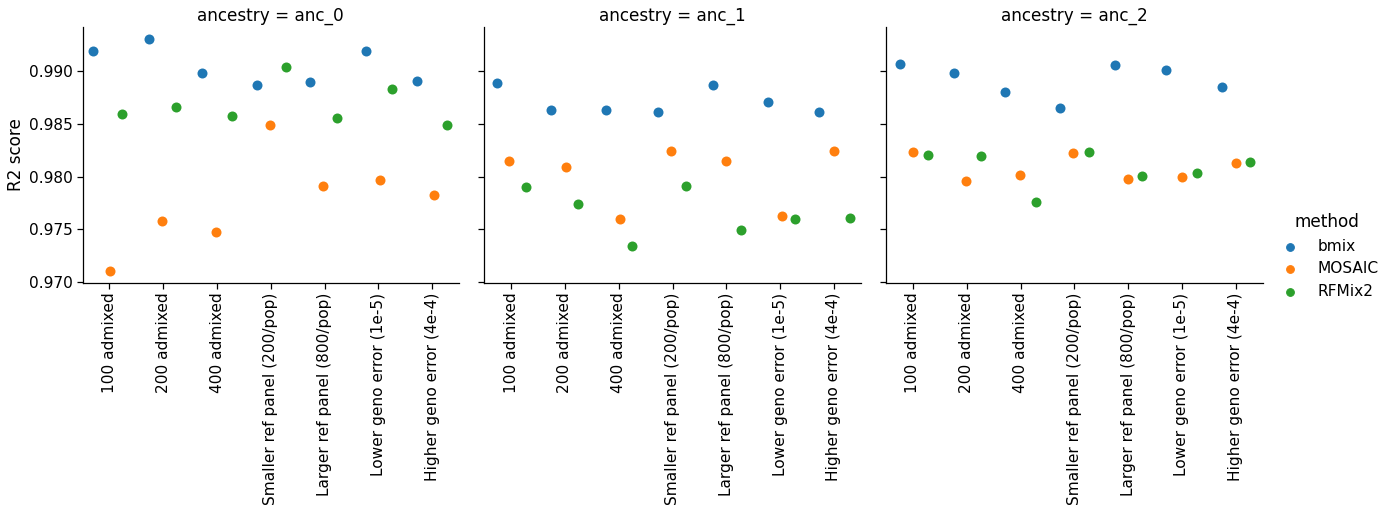

In [41]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')


to_plot = [x for x in threepop_order[:8] if x != '3pop_6']
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    col='ancestry',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect=1.2,
    s=10
)

g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R2 score')
#g.set(ylim= [0.93, 1])

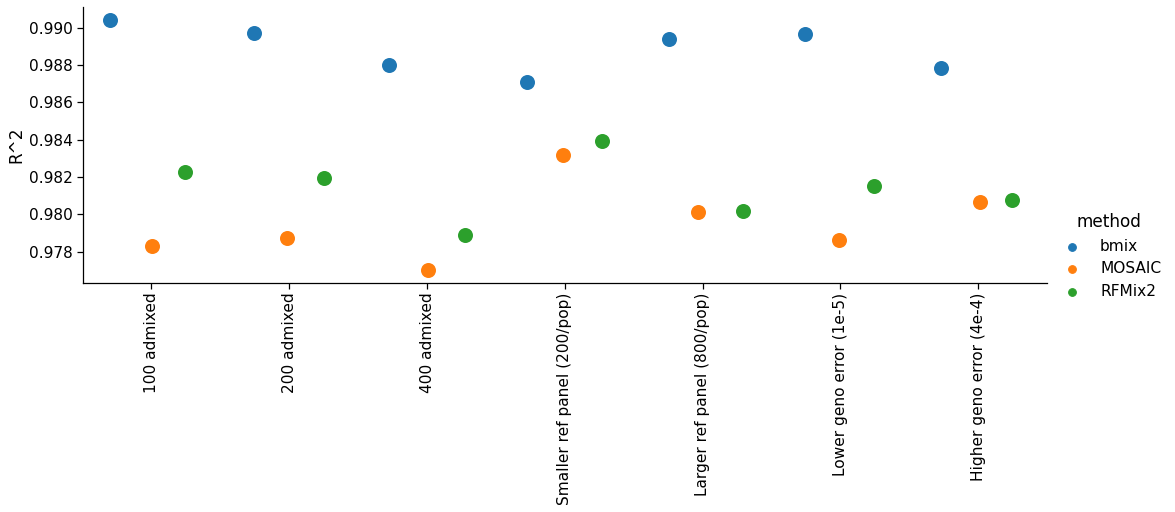

In [43]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()
to_plot = [x for x in threepop_order[:8] if x != '3pop_6'] 
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    #col='ancestry',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=True,
    jitter=True,
    alpha=1,
    kind='strip',
    aspect=3,
    #marker="D",
    s=15
)

g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels(rotation=90)
g.set(xlabel='')
g.set(ylabel='R^2')
#g.set(ylim= [0.95, 1])

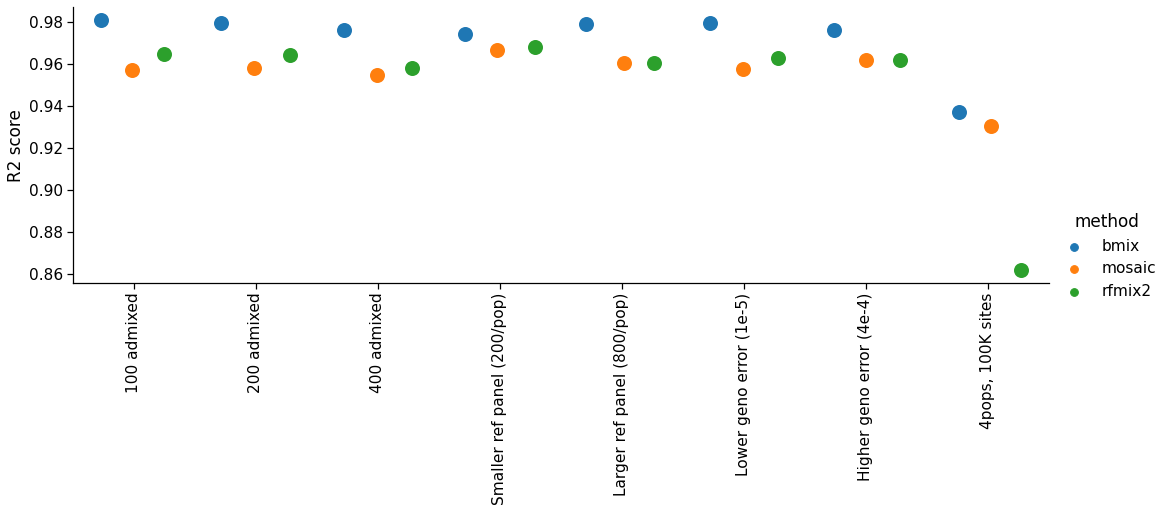

In [59]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()
to_plot = [x for x in threepop_order[:8] if x != '3pop_6'] + ['4pop_b']
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    #col='ancestry',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=True,
    jitter=True,
    alpha=1,
    kind='strip',
    aspect=3,
    #marker="D",
    s=15
)

g.set_xticklabels([names_dict[x] for x in to_plot])
g.set_xticklabels(rotation=90)
g.set(xlabel='')
g.set(ylabel='R2 score')


#g.set(ylim= [0.8, 1])

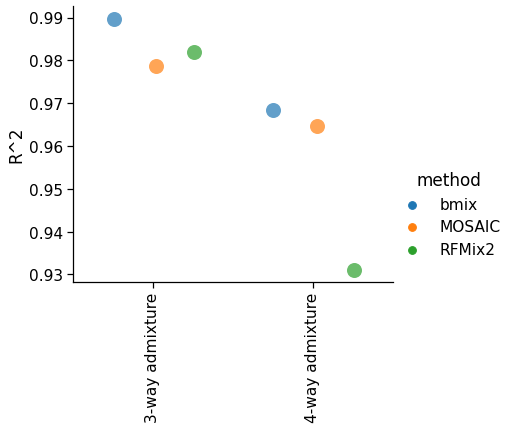

In [45]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

to_plot = ['3pop_2', '4pop_b']
data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()


g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    #col='ancestry',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    #col_order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id'),
    dodge=True,
    alpha=.7,
    kind='strip',
    aspect=1.2,
    s=15
)

g.set_xticklabels(['3-way admixture', '4-way admixture'], rotation=90)
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R^2')

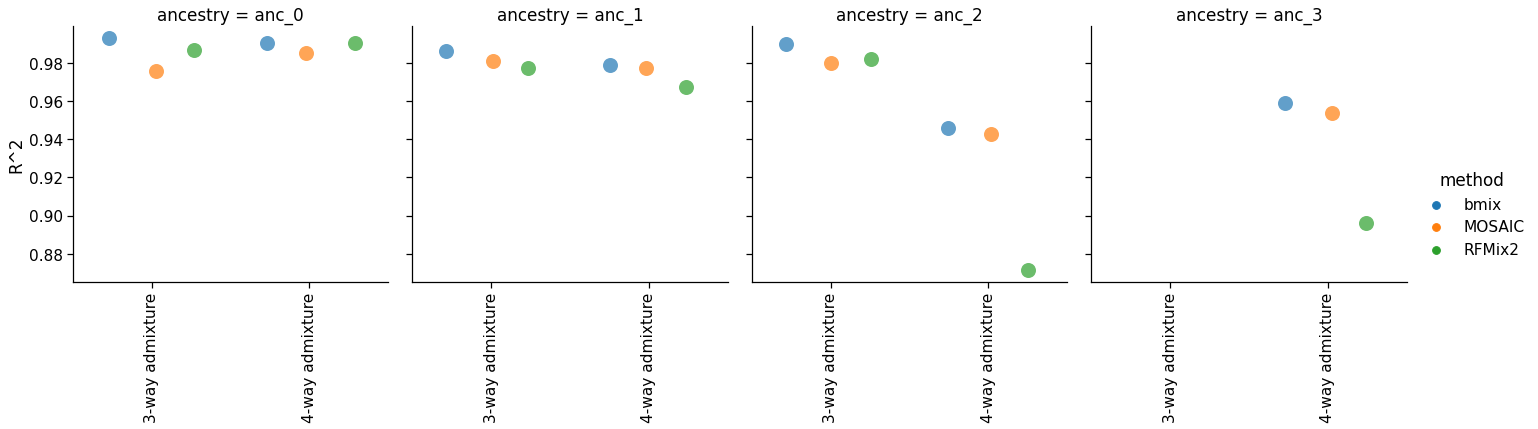

In [46]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

to_plot = ['3pop_2', '4pop_b']


g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    col='ancestry',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    col_order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id'),
    dodge=True,
    alpha=.7,
    kind='strip',
    aspect=1,
    s=15
)

g.set_xticklabels(['3-way admixture', '4-way admixture'], rotation=90)
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R^2')

## Effect of number of sites

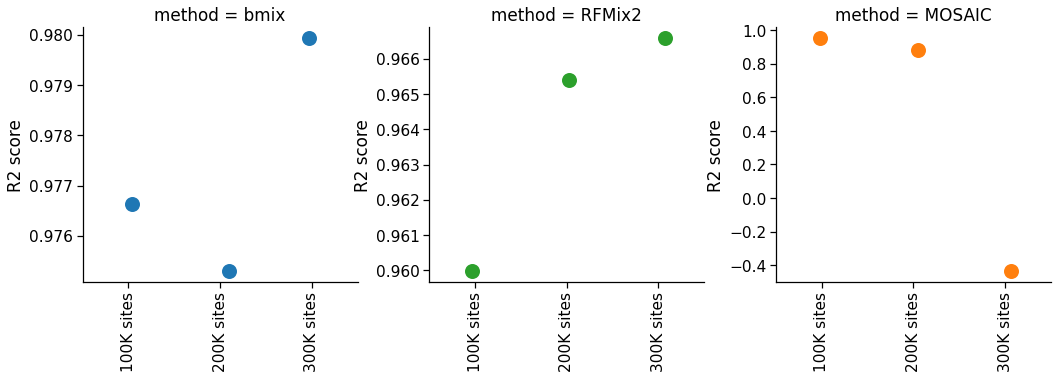

In [22]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

to_plot = ['3pop_b', '3pop_d', '3pop_e']
data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()

g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    col='method',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    col_order=['bmix', 'RFMix2', 'MOSAIC'],
    data=data.sort_values('anal_id'),
    #dodge=True,
    alpha=1,
    kind='strip',
    aspect=1,
    s=15, 
    sharey=False
)

g.set_xticklabels(['100K sites', '200K sites', '300K sites'])
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R2 score')

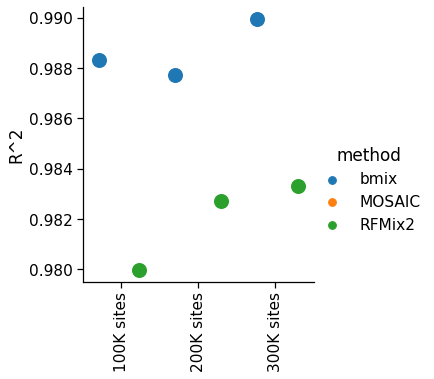

In [47]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

to_plot = ['3pop_b', '3pop_d', '3pop_e']
data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()
data = data.query('method != "MOSAIC"')
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    #col='method',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    #col_order=['bmix',  'rfmix2',],
    data=data.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect=1,
    s=15, 
)

g.set_xticklabels(['100K sites', '200K sites', '300K sites'])
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R^2')

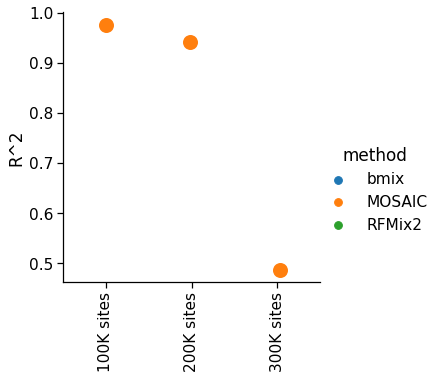

In [48]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')

to_plot = ['3pop_b', '3pop_d', '3pop_e']
data = data.groupby(['anal_id', 'method'])[['R2_score']].mean().reset_index()
data = data.query('method == "MOSAIC"')
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    #col='method',
    order = to_plot,
    hue_order = ['bmix', 'MOSAIC', 'RFMix2'],
    #col_order=['bmix',  'rfmix2',],
    data=data.sort_values('anal_id'),
    dodge=True,
    alpha=1,
    kind='strip',
    aspect=1,
    s=15, 
)
g.set_xticklabels(['100K sites', '200K sites', '300K sites'])
g.set_xticklabels( rotation=90)
g.set(xlabel='')
g.set(ylabel='R^2')

In [36]:
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
data.groupby('method')['R2_score'].mean()

method
bmix      0.974328
mosaic    0.950438
rfmix2    0.950405
Name: R2_score, dtype: float64

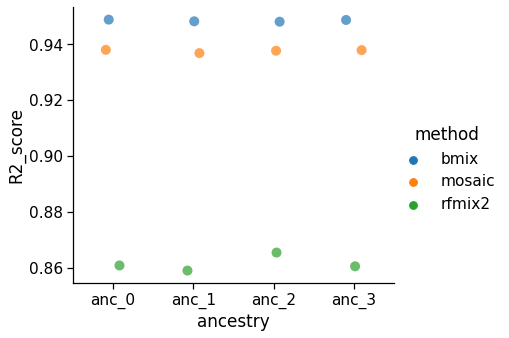

In [13]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
g = sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    #col='ancestry',
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id').query('anal_id=="4pop_test"'),
    dodge=False,
    alpha=.7,
    kind='strip',
    aspect=1.2,
    s=10
)

#g.set_xticklabels(list(names_dict.values()), rotation=60)

In [30]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), 
               ['model_name', 'sim_id', 'anal_id', 'method'], 
               var_name='ancestry', 
               value_name='R2_score')
g = sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    data=data.sort_values('anal_id').query('anal_'),
    dodge=True,
    alpha=.5,
    zorder=1,
    kind='strip',
    aspect = 1,
    s=10
)

UndefinedVariableError: name 'anal_' is not defined

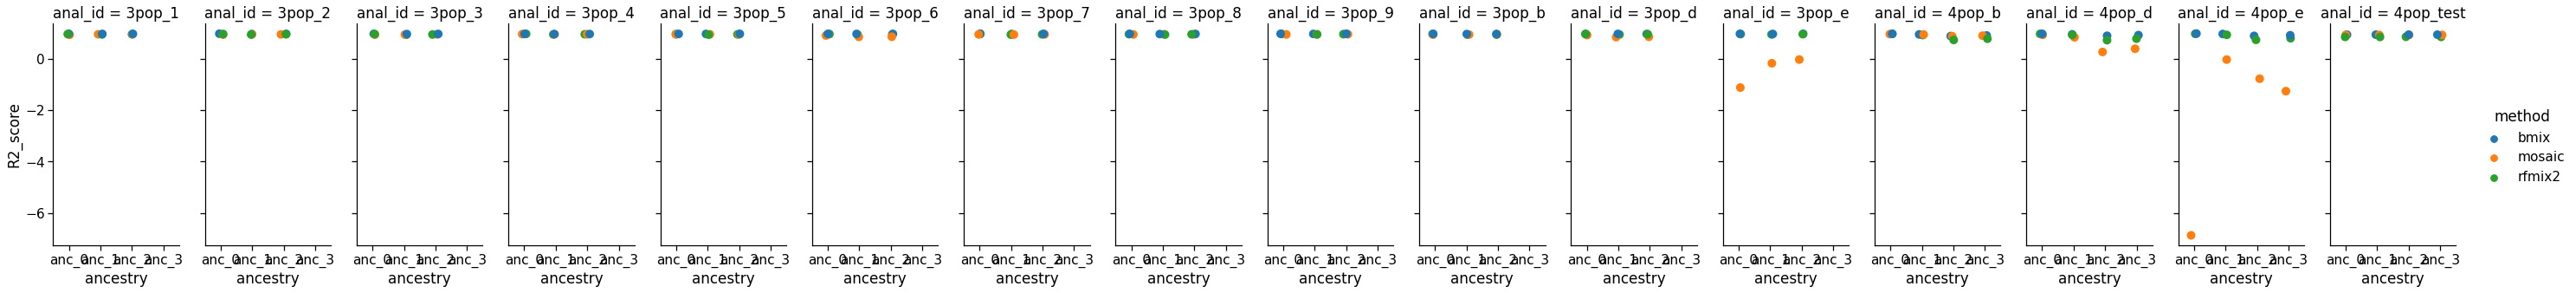

In [14]:
# Show each observation with a scatterplot
data = pd.melt(R2_anc.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ancestry', value_name='R2_score')
sns.catplot(
    x="ancestry",
    y="R2_score",
    hue="method",
    col='anal_id',
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    order=['anc_0', 'anc_1', 'anc_2', 'anc_3'],
    #col_order=['anc_0', 'anc_1', 'anc_2'],
    data=data.sort_values('anal_id'),
    dodge=0,
    alpha=1,
    zorder=1,
    kind='strip',
    aspect=.5,
    s=10
)

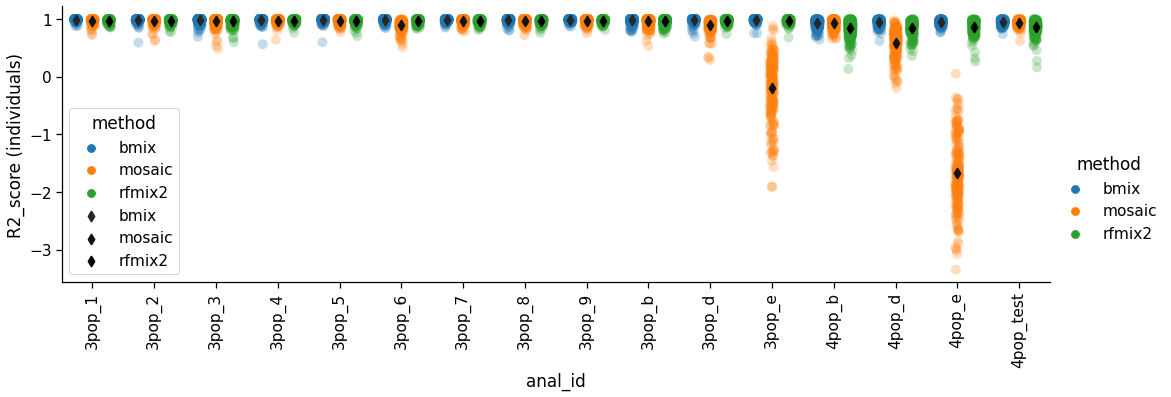

In [17]:
# Show each observation with a scatterplot
data = pd.melt(R2_ind.reset_index(), ['model_name', 'sim_id', 'anal_id', 'method'], var_name='ind', value_name='R2_score')
g = sns.catplot(
    x="anal_id",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    data=data.sort_values('anal_id'),
    dodge=1,
    alpha=.25,
    zorder=1,
    kind='strip',
    aspect=3,
    s=10
)

sns.pointplot(x="anal_id",
    y="R2_score",
    hue="method",
    hue_order = ['bmix', 'mosaic', 'rfmix2'],
    data=data.sort_values('anal_id'),
    dodge=.8 - .8 / 3,
    join=False,
    #palette="dark",
    color='k',
    markers="d",
    scale=1,
    ci=None,
    alpha = 1)

#g.set_xticklabels(list(names_dict.values()), rotation=60)
g.set_xticklabels(rotation=90)
g.set_ylabels('R2_score (individuals)')